In [2]:
import pandas as pd

df_session_summary = pd.read_csv('/content/session_summary.csv')
df_mouse_movements = pd.read_csv('/content/mouse_movements.csv')
df_clicks_data = pd.read_csv('/content/clicks_data.csv')

In [3]:
display(df_session_summary.head())
display(df_session_summary.info())
display(df_mouse_movements.head())
display(df_mouse_movements.info())
display(df_clicks_data.head())
display(df_clicks_data.info())

,TempoTotalSegundos,TotalCliques,TotalMovimentos
0,143.503,27,1210


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TempoTotalSegundos  1 non-null      float64
 1   TotalCliques        1 non-null      int64  
 2   TotalMovimentos     1 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 156.0 bytes


None

,Timestamp,PosX,PosY
0,0.000,544,391
1,0.567,134,350
2,0.583,127,350
3,0.700,134,346
4,0.717,158,324


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  1210 non-null   float64
 1   PosX       1210 non-null   int64  
 2   PosY       1210 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 28.5 KB


None

,Timestamp,PosX,PosY,ShapeIndex,ShapeType
0,7.986,279,202,0,Criacao_Circulo
1,12.003,334,595,0,Criacao_Linha
2,18.714,595,406,0,Criacao_Poligono
3,23.657,635,201,1,Criacao_Poligono
4,31.928,711,659,2,Criacao_Poligono


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   27 non-null     float64
 1   PosX        27 non-null     int64  
 2   PosY        27 non-null     int64  
 3   ShapeIndex  27 non-null     int64  
 4   ShapeType   27 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 1.2+ KB


None

In [4]:
df_mouse_movements['Timestamp'] = pd.to_datetime(df_mouse_movements['Timestamp'], unit='s')
df_clicks_data['Timestamp'] = pd.to_datetime(df_clicks_data['Timestamp'], unit='s')

df_mouse_movements = df_mouse_movements.sort_values(by='Timestamp')
df_clicks_data = df_clicks_data.sort_values(by='Timestamp')

display(df_mouse_movements.head())
display(df_clicks_data.head())

,Timestamp,PosX,PosY
0,1970-01-01 00:00:00.000,544,391
1,1970-01-01 00:00:00.567,134,350
2,1970-01-01 00:00:00.583,127,350
3,1970-01-01 00:00:00.700,134,346
4,1970-01-01 00:00:00.717,158,324


,Timestamp,PosX,PosY,ShapeIndex,ShapeType
0,1970-01-01 00:00:07.986,279,202,0,Criacao_Circulo
1,1970-01-01 00:00:12.003,334,595,0,Criacao_Linha
2,1970-01-01 00:00:18.714,595,406,0,Criacao_Poligono
3,1970-01-01 00:00:23.657,635,201,1,Criacao_Poligono
4,1970-01-01 00:00:31.928,711,659,2,Criacao_Poligono


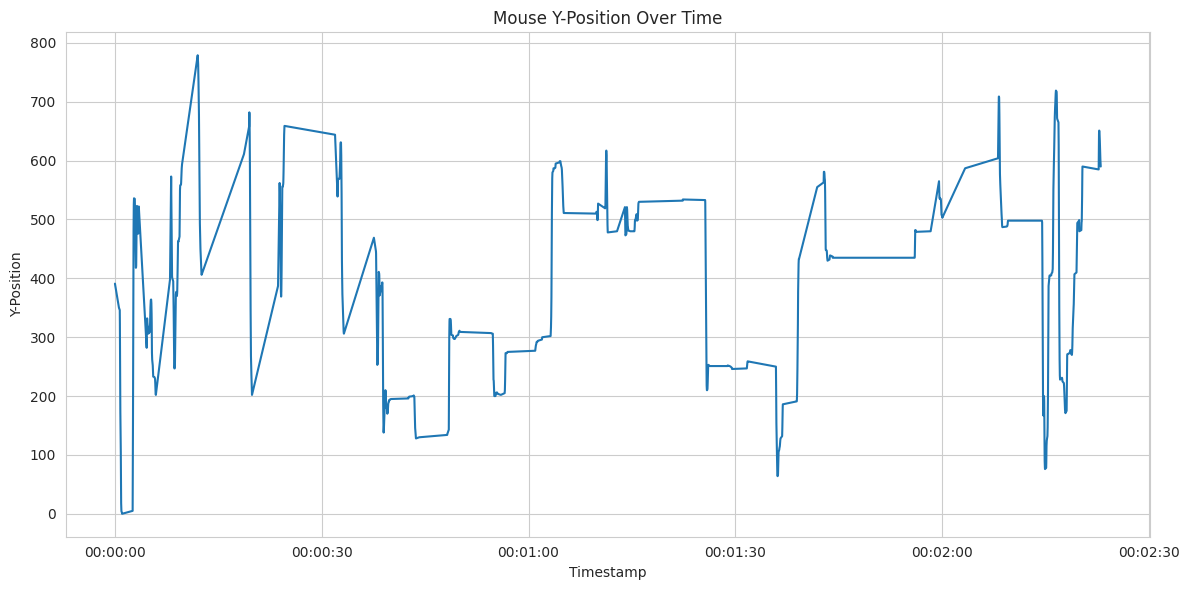

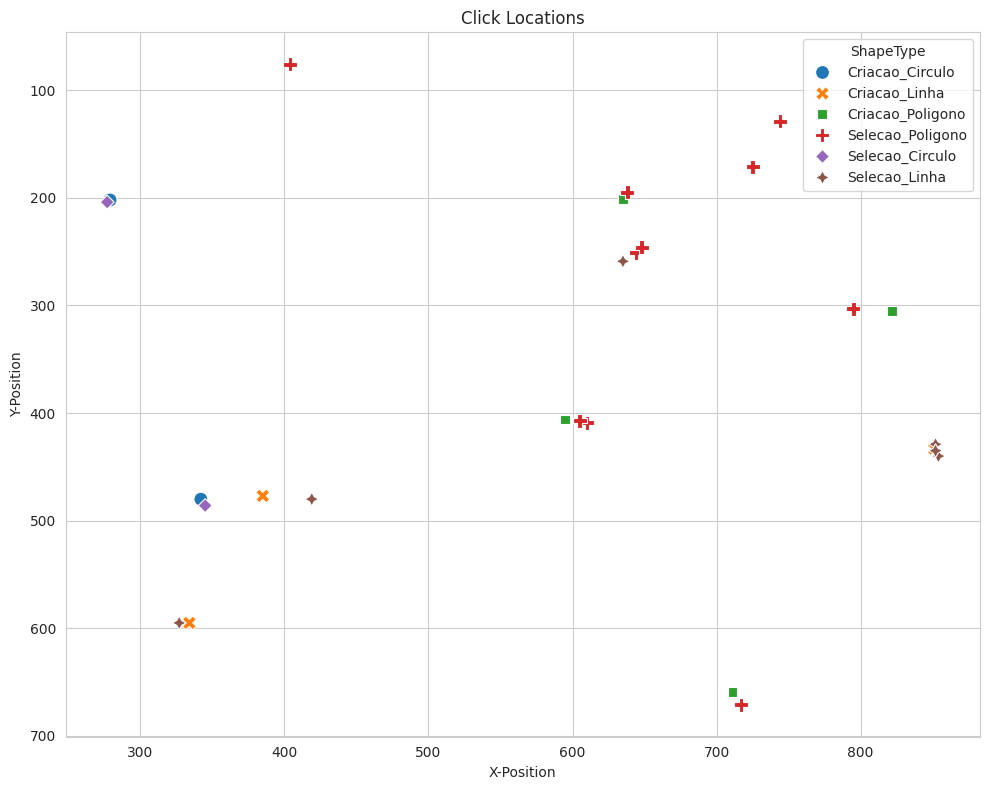

/tmp/ipython-input-1067307753.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_summary_melted, x='Metric', y='Value', palette='viridis')


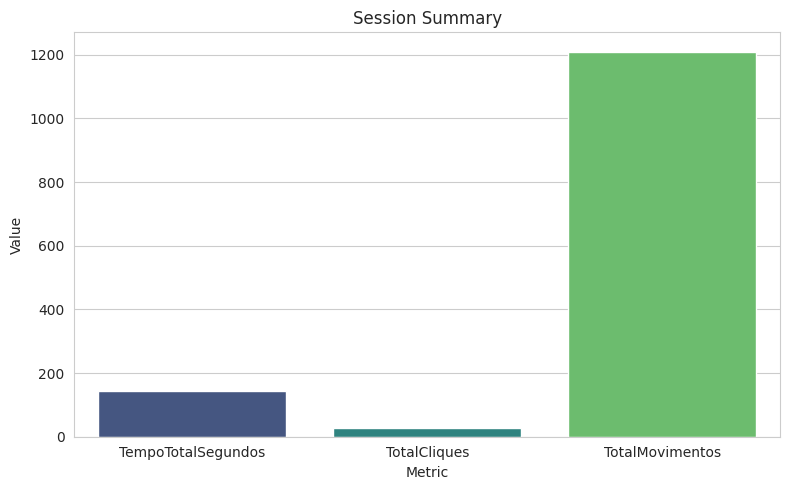

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# 1. Mouse movements over time (PosY)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_mouse_movements, x='Timestamp', y='PosY')
plt.title('Mouse Y-Position Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Y-Position')
plt.tight_layout()
plt.savefig("mouse-y.png")
plt.show()

# 2. Click locations
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_clicks_data, x='PosX', y='PosY', hue='ShapeType', s=100, style='ShapeType')
plt.title('Click Locations')
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.gca().invert_yaxis() # Invert Y-axis as screen coordinates usually start from top-left
plt.tight_layout()
plt.savefig("click-locations.png")
plt.show()

# 3. Session summary bar plot
# Reshape the single row dataframe for easier plotting
df_summary_melted = df_session_summary.melt(var_name='Metric', value_name='Value')

plt.figure(figsize=(8, 5))
sns.barplot(data=df_summary_melted, x='Metric', y='Value', palette='viridis')
plt.title('Session Summary')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()
plt.savefig("session-summary.png")
plt.show()